# Spambase Project - Intro to ML Final

## Leon Huang and Leon Jiao

### Introduction
The following project will center around predicting whether an email is a spam email based off of characters, words, and phrases contained within the email. Throughout, we will be using machine learning techniques that we have learned during the INFO 1998 course. 

[Insert some shit]

#### Source

https://archive.ics.uci.edu/dataset/94/spambase

### Preliminary Steps: Data at a First Glance

First, we import the necessary packages.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the Feature names

In [ ]:
with open("spambase.names", "r") as namesFile:
    namesInfo = namesFile.readlines()

for index, line in enumerate(namesInfo):
    print(index, "\t", line)

By inspection, the feature names begin at index 33.

In [ ]:
# This yields our 57 features of interest
featuresList = namesInfo[33:]
featureNames = [name[: name.index(":")] for name in featuresList]
featureNames.append("spam_class")
featureNames

### Load the data 

In [ ]:
data = pd.read_csv("spambase.data", names=featureNames)
data.head()

In [ ]:
# Get data statistics
data.describe()

In [ ]:
data.shape

Here, we can see that there are 4601 data points for us to analyze. 

# Correlation Matrix Visualization

This matrix displays the value of the Pearson correlation coefficient between each of the features.

In [ ]:
correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm')

We look at the heatmap correlating features with spam classification. 

In [ ]:
sns.heatmap(correlation[["spam_class"]])

Sort these features to identify those with the greatest correlation coefficients, taking the absolute value to disregard negatives. 

In [ ]:
spam_corr = correlation["spam_class"].abs()
# spam_corr = sorted(spam_corr)
spam_corr = spam_corr.sort_values(ascending=False)[1:]
spam_corr

#### We see that our top 5 features correlated with spam classification are the word frequencies of your, 000, remove, and you, and the character frequency of $.

#### The top 10 features correlated with spam classification are word frequencies of your, 000, remove, you, free, business, hp, and our; the character frequency of $; and the total length of sequences of capital letters.

In [ ]:
features_5 = list(spam_corr[:5].keys())
features_10 = list(spam_corr[:10].keys())
X = data[features_5]
X2 = data[features_10]
Y = data["spam_class"]

# Machine Learning Models

With these five features, we are now ready to do machine learning!

We will look at five models: A Decision Tree Classifier, a Random Forest Classifier, a K-Neighbors Classifier, Logistic Regression, and Support Vector Machine.

#### Split the data using train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# A dictionary to save the accuracies of different models for a later visualization
accuracies5 = {}

#### Decision Tree Classifier

We need to find the most optimal depth that maximizes the accuracy of the model. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

best_depth = 1
best_accuracy = -1

for x in range(1, 50):
    model = DecisionTreeClassifier(max_depth = x)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    score = accuracy_score(prediction, y_test)
    
    if(score > best_accuracy):
        best_depth = x
        best_accuracy = score
        
accuracies5["Decision Tree"] = best_accuracy
print("The Decision Tree is most accurate when it has depth {depth}.".format(depth=best_depth))
print("The greatest accuracy of the Decision Tree is {acc}.".format(acc=best_accuracy))

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rmodel = RandomForestClassifier()
rmodel.fit(x_train, y_train)
rpredictions = rmodel.predict(x_test)

accuracies5["Random Forest"] = accuracy_score(rpredictions, y_test)
print("Accuracy Score with a Random Forest Classifier:", accuracy_score(rpredictions, y_test))

#### K-Neighbors Classifier

We find the optimal number of neighbors.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

best_k = 1
best_accuracy = -1

for x in range(1, 50):
    kmodel = KNeighborsClassifier(n_neighbors = x)
    kmodel.fit(x_train, y_train)
    prediction = kmodel.predict(x_test)
    score = accuracy_score(prediction, y_test)
    
    if(score > best_accuracy):
        best_k = x
        best_accuracy = score

accuracies5["K-Neighbors"] = best_accuracy
print("Accuracy Score with a K-Nearest Neighbors Classifier with {k} neighbors: {acc}".format(k=best_k, acc=best_accuracy))

Accuracy Score with a K-Nearest Neighbors Classifier with 1 neighbors: 0.7980456026058632


#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression()
lmodel.fit(x_train, y_train)
lpredictions = lmodel.predict(x_test)

accuracies5["Logistic Regression"] = accuracy_score(lpredictions, y_test)
print("Accuracy Score with a Logistic Regression:", accuracy_score(lpredictions, y_test))

Accuracy Score with a Logistic Regression: 0.8675352877307275


/Users/leonhuang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Support Vector Machine

In [25]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracies5["Support Vector Machine"] = accuracy_score(predictions, y_test)
print("Accuracy Score with SVM:", accuracy_score(predictions, y_test))

Accuracy Score with SVM: 0.6547231270358306


### We see that for 5 features, the Random Forest Classifier had the highest accuracy.

In [26]:
accuracies5

{'Decision Tree': 0.8534201954397395,
 'Random Forest': 0.8566775244299675,
 'K-Neighbors': 0.7980456026058632,
 'Logistic Regression': 0.8675352877307275,
 'Support Vector Machine': 0.6547231270358306}

Create a bar plot of the accuracies for 5 features.

<BarContainer object of 5 artists>

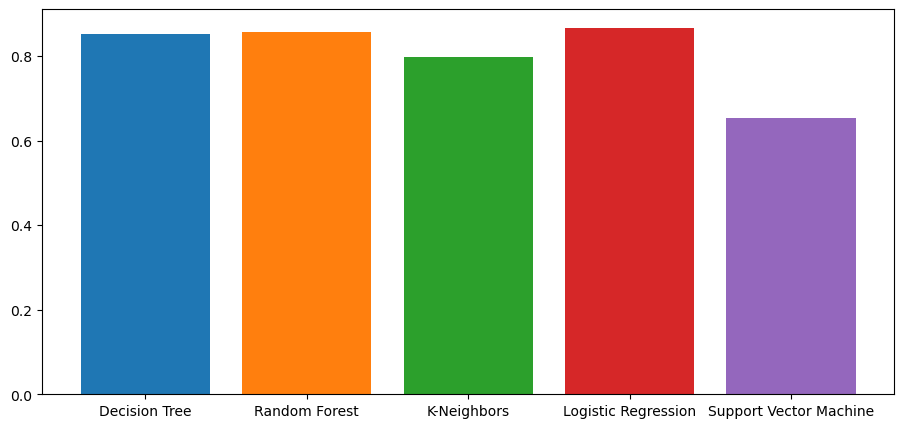

In [41]:
plt.figure(figsize = (11, 5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.bar(accuracies5.keys(), accuracies5.values(), color = colors)

#### Repeat all the same procedures for 10 correlated features. 

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)
accuracies10 = {}

# Decision Tree
best_depth = 1
best_accuracy = -1
for x in range(1, 50):
    model = DecisionTreeClassifier(max_depth = x)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    score = accuracy_score(prediction, y_test)
    
    if(score > best_accuracy):
        best_depth = x
        best_accuracy = score
        
accuracies10["Decision Tree"] = best_accuracy

# Random Forest
rmodel = RandomForestClassifier()
rmodel.fit(x_train, y_train)
rpredictions = rmodel.predict(x_test)
accuracies10["Random Forest"] = accuracy_score(rpredictions, y_test)

# K-Neighbors
best_k = 1
best_accuracy = -1
for x in range(1, 50):
    kmodel = KNeighborsClassifier(n_neighbors = x)
    kmodel.fit(x_train, y_train)
    prediction = kmodel.predict(x_test)
    score = accuracy_score(prediction, y_test)
    
    if(score > best_accuracy):
        best_k = x
        best_accuracy = score

accuracies10["K-Neighbors"] = best_accuracy

# Logistic Regression
lmodel = LogisticRegression(max_iter=1000)
lmodel.fit(x_train, y_train)
lpredictions = lmodel.predict(x_test)
accuracies10["Logistic Regression"] = accuracy_score(lpredictions, y_test)

# SVM
model = SVC(kernel="linear")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracies10["Support Vector Machine"] = accuracy_score(predictions, y_test)

### We improved our highest accuracy to 91.9% with 10 correlated features!

In [37]:
accuracies10

{'Decision Tree': 0.9098805646036916,
 'Random Forest': 0.9218241042345277,
 'K-Neighbors': 0.7980456026058632,
 'Logistic Regression': 0.8664495114006515,
 'Support Vector Machine': 0.8740499457111836}

<BarContainer object of 5 artists>

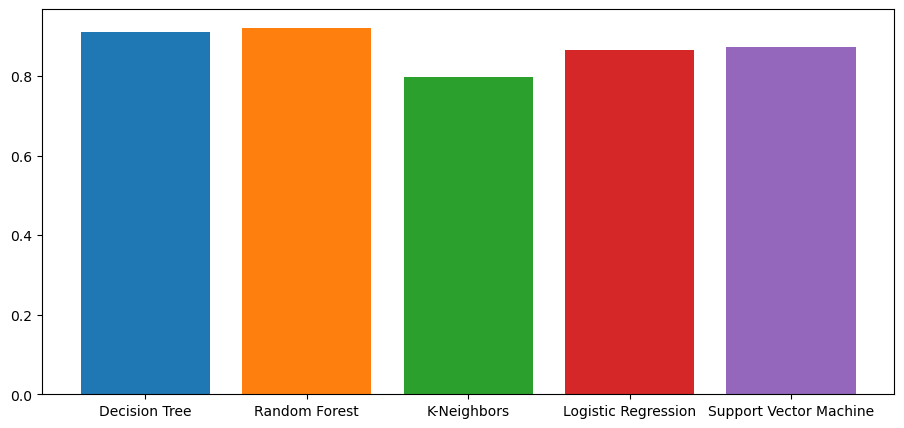

In [44]:
plt.figure(figsize = (11, 5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.bar(accuracies10.keys(), accuracies10.values(), color = colors)

## Confusion Matrix Visualization

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rmodel, x_test, y_test, normalize='true')

In [ ]:
#KNeighbors Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, kmodel.predict(x_test)).ravel()

print("Total Data Points: " + str(tn + fp + fn + tp))
print("KNeighbors True Negative Rate: " + str(tn))
print("KNeighbors True Positive Rate: " + str(tp))
print("KNeighbors False Negative Rate: " + str(fn))
print("KNeighbors False Positive Rate: " + str(fp))

ConfusionMatrixDisplay.from_estimator(kmodel, x_test, y_test, normalize='true')

In [ ]:
#Logistic Regression Confusion Matrix

tn, fp, fn, tp = confusion_matrix(y_test, lmodel.predict(x_test)).ravel()

print("Total Data Points: " + str(tn + fp + fn + tp))
print("Logistic Regression True Negative Rate: " + str(tn))
print("Logistic Regression True Positive Rate: " + str(tp))
print("Logistic Regression False Negative Rate: " + str(fn))
print("Logistic Regression False Positive Rate: " + str(fp))

ConfusionMatrixDisplay.from_estimator(lmodel, x_test, y_test, normalize='true')

## Observations from Confusion Matrix

The first observation that we 